In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
from IPython.core.pylabtools import figsize


In [3]:
plt.style.use('ggplot')

# Law of Large Numbers


## *The law of large numbers (LLN) says that the mean of a large sample is close to the mean of the distribution.* 

   - There are two versions of the LLN - __the Strong LLN (SLLN)__ and __the Weak LLN (WLLN)__. Before we discuss the LLN itself, let's first discuss the notion of __convergence of random variables__.

### Convergence of Random Variables 

Let $X_{1}, X_{2},...$ be a sequence of random variables and let $X$ be another random variable.

Let $F_{n}$ denote the cdf of $X_{n}$ and let $F$ be the cdf of $X$.

These are a few common types of connvergence:

-  $X_{n}$ converges almost surely to $X$, written $X_{n} -->^{a.s.} X$, if, for every c > 0,
                
$$P(\lim\limits_{n->inf} |X_{n} - X| < c) = 1 $$

-  $X_{n}$ converges to $X$ in probability, written $X_{n} -->^{p} X$, if, for every c > 0,

$$P(|X_{n} - X| > c)  -> 0$$

-  $X_{n}$ converges to $X$ in quadratic mean, written $X_{n} -->^{qm} X$, if

$$E(X_{n} - X)^{2} -> 0$$

- $X_{n}$ converges to $X$ in distribution, written $X_{n} -->^{d} X$, if

$$\lim_{n->inf} F_{n}(t) = F(t)$$

*For more in-depth explanation of the notion of convergence for random variables, please refer to Larry Wasserman's All of Statistics. 

### Now, we can discuss the two versions of the Law of Large Numbers. Here are the definitions:
Let $X_{1}, X_{2},...$ be an iid sample, let $\mu = E(X_{1})$ and let $\sigma^{2} = Var(X_{1})$
-  __The Weak Law of Large Numbers__: if $X_{1},...,X_{n}$ are iid, then $n^{-1}\sum\limits_{i=1}^{n} X_{i}$ converges in probability to $\mu$

      In other words, the distribution of the sample mean $n^{-1}\sum\limits_{i=1}^{n} X_{i}$ becomes more concentrated around $\mu$ as $n$ gets large.
     
- __*The Strong Law of Large Numbers__: if $X_{1},...,X_{n}$ are iid, then $n^{-1}\sum\limits_{i=1}^{n} X_{i}$ converges almost surely to $\mu$ 



In [4]:
class LLN:
    def __init__(self, sample_size, no_means, no_seq):
        self.sample_size = sample_size
        self.no_means = no_means
        self.no_seq = no_seq
        self.available_distributions = ["poisson", "normal", "exponential"]
        figsize(12.5,6)
    
    def plot_graph(self,name, exp, N_samples, averages, y_lim):
        
        plt.plot(N_samples, exp * np.ones_like(averages), ls="--", label="true expected value", c="k")
        
        plt.ylim(exp - y_lim, exp + y_lim)
        plt.title(name + " - Sample mean converging to true expected value as n grows larger")
        plt.xlabel("sample size")
        plt.ylabel("sample mean")
        plt.legend()
        plt.show()
    
    def poisson(self, lam, y_fluctuation):
        name = "Poisson Distribution"
        expectation = lam
        seq = np.random.poisson
        N_samples = range(1, self.sample_size, self.no_means)
        
        for k in range(self.no_seq):
            seq_generated = seq(expectation, size = self.sample_size)
            averages = [np.mean(seq_generated[:i]) for i in N_samples]
            plt.plot(N_samples, averages, label="mean of $n$ samples from seq: %d" % k)
        
        self.plot_graph(name, expectation, N_samples, averages, y_fluctuation)


    def normal(self, mu, sigma, y_fluctuation):
        name = "Normal Distribution"
        expectation = mu
        std = sigma
        seq = np.random.normal
        N_samples = range(1, self.sample_size, self.no_means)
        
        for k in range(self.no_seq):
            seq_generated = seq(expectation, std, size = self.sample_size)
            averages = [np.mean(seq_generated[:i]) for i in N_samples]
            plt.plot(N_samples, averages, label="mean of $n$ samples from seq: %d" % k)
        
        self.plot_graph(name, expectation, N_samples, averages, y_fluctuation)
        
    def exponential(self, scale, y_fluctuation):
        name = "Exponential Distribution"
        expectation = scale
        seq = np.random.exponential
        N_samples = range(1, self.sample_size, self.no_means)
        
        for k in range(self.no_seq):
            seq_generated = seq(scale, size = self.sample_size)
            averages = [np.mean(seq_generated[:i]) for i in N_samples]
            plt.plot(N_samples, averages, label = "mean of $n$ samples from seq: %d" % k)
        
        self.plot_graph(name, expectation, N_samples, averages, y_fluctuation)
        
        

In [10]:
l = LLN(100000, 100, 3)

print(l.available_distributions)

['poisson', 'normal', 'exponential']


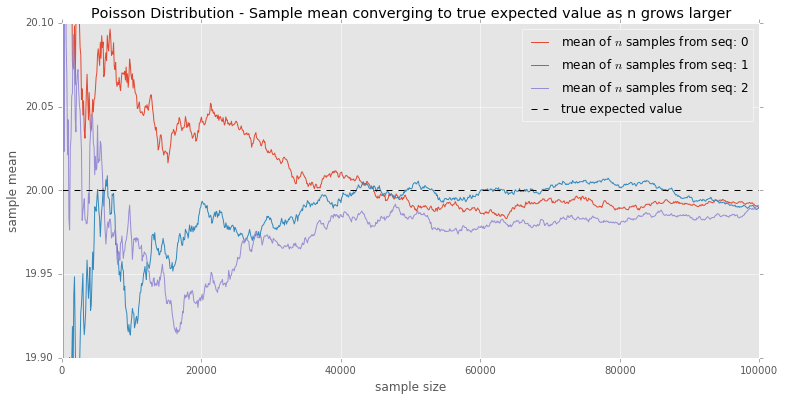

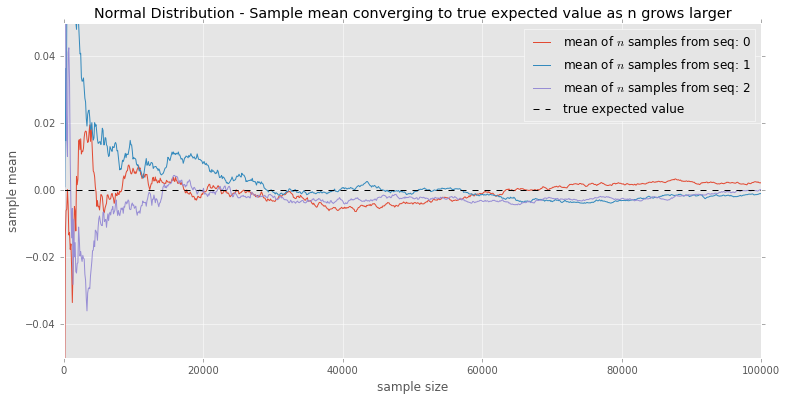

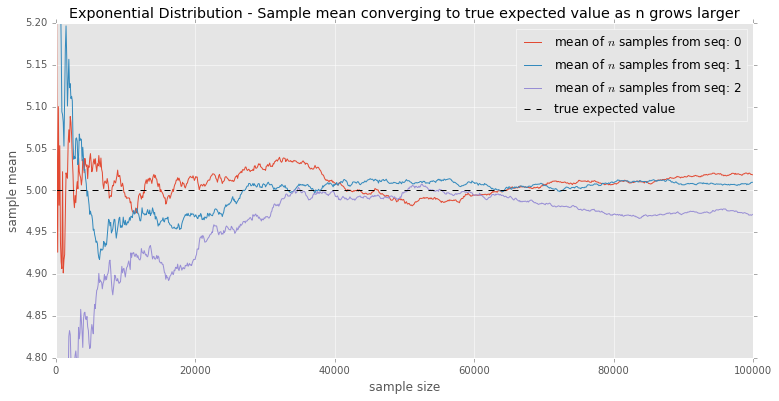

In [11]:
#plots for different distributions, last parameter is y_limit (how much graph on y_axis do you wish to see)
pois_lln = l.poisson(20, 0.1) 
norm_lln = l.normal(0.0, 1.0, 0.05)
exp_lln = l.exponential(5,0.2)